In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


tf.__version__

'2.18.0'

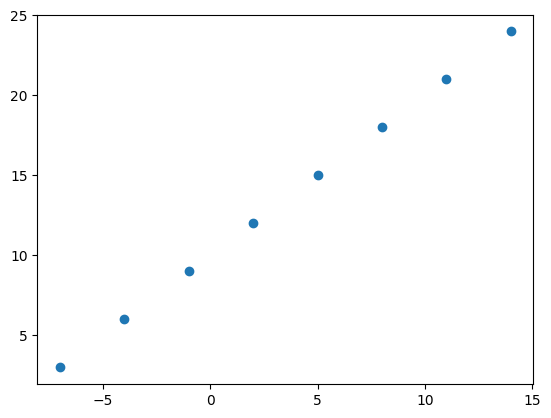

In [2]:
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])
Y = np.array([3, 6, 9, 12, 15, 18, 21, 24])

# visualize
plt.scatter(X, Y)

In [3]:
Y == X+10 # this is the relation-ship we want out model to figure out

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Inpur and output shapes

- we need to predict y value for each x value
- so input and output should be 1

### creating a model

step 1: prepare you data. that is conert data to tensor

step 2: create model using Sequential API

In [4]:
tf.random.set_seed(42)

# step 1
X = tf.constant(X)
Y = tf.constant(Y)

X, Y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [5]:
# step 2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # TODO: if this is input layer why we are not declraing anoner one for output layer
])

# step 3 -> compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # evaluation metrics

# step 4 -> fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.1169 - mae: 10.1169
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 9.9844 - mae: 9.9844
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 9.8519 - mae: 9.8519
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 9.7194 - mae: 9.7194
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 9.5869 - mae: 9.5869


#### expand_dims

> If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [ ]:
X, tf.expand_dims(X, axis=-1)

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8, 1), dtype=int64, numpy=
 array([[-7],
        [-4],
        [-1],
        [ 2],
        [ 5],
        [ 8],
        [11],
        [14]])>)

In [ ]:
X.shape, tf.expand_dims(X, axis=-1).shape

(TensorShape([8]), TensorShape([8, 1]))

#### other way of sequential api

there are quite different way to do the same thing in tensorflow
[docs](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [ ]:
# example from docs
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

In [ ]:
model  = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

### Make prediction

In [6]:
X, Y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [9]:
y_pred = model.predict(tf.constant([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [12]:
(27 - y_pred )*100/27 # that's 27% error

array([[27.935854]], dtype=float32)